# Image Preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
x_train=train_datagen.flow_from_directory(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [13]:
x_test=test_datagen.flow_from_directory(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


# Model Building

In [14]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

**add the Pooling Layer**

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))


**Adding the flatten Layer**

In [18]:
model.add(Flatten())

**Adding the Dense Layer**

In [19]:
model.add(Dense(200,activation='relu'))


In [20]:
model.add(Dense(200,activation='relu'))

In [21]:
model.add(Dense(9,activation="softmax"))

**Compile the model**

In [22]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [23]:
len(x_train)

525

In [24]:
len(x_test)

75

In [25]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Fit and Save the Model**

In [26]:
model.fit(x_train,epochs=1,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

525/525 [==============================] - 62s 114ms/step - loss: 0.2839 - accuracy: 0.9047 - val_loss: 0.1561 - val_accuracy: 0.9684


In [27]:
model.save('C:/Users/welcome/Downloads/sign-language-recognition-project/signlanguage-new.h5')

# Test The Model

In [28]:
from keras.models import load_model
import numpy as np
import h5py
import cv2



In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [30]:
model = load_model('C:/Users/welcome/Downloads/sign-language-recognition-project/signlanguage-new.h5')

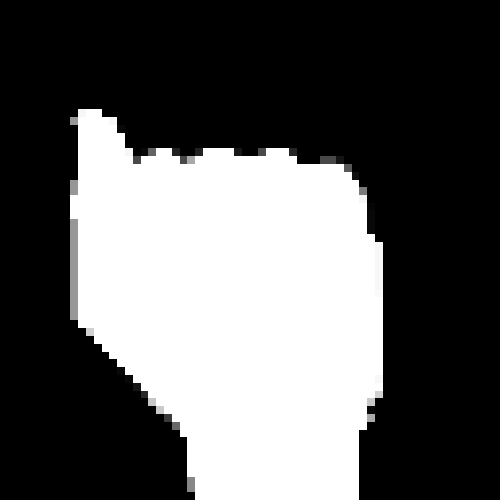

In [31]:
img =image.load_img(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\test_set\A\8.png",target_size = (500,500))
img


In [32]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [33]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [41]:
x= image.img_to_array(img)

In [42]:
frame=cv2.imread(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\test_set\A\9.png")
data=detect(frame)

In [43]:

cv2.imshow("frame",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [44]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('signlanguage-new.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step


# type(img)

In [50]:
x = image.img_to_array(img)
x

array([[[113., 100., 107.],
        [112., 100., 122.],
        [116., 107., 134.],
        ...,
        [198., 177., 196.],
        [208., 185., 193.],
        [210., 193., 199.]],

       [[106., 102., 117.],
        [123., 100., 106.],
        [122., 103., 123.],
        ...,
        [194., 181., 188.],
        [197., 184., 191.],
        [206., 186., 188.]],

       [[123.,  99., 115.],
        [121., 107., 124.],
        [128., 104., 136.],
        ...,
        [183., 161., 174.],
        [164., 158., 170.],
        [174., 162., 166.]],

       ...,

       [[116.,  94., 115.],
        [119.,  90., 118.],
        [131., 100., 116.],
        ...,
        [ 55.,  48.,  79.],
        [ 49.,  54.,  83.],
        [ 49.,  56.,  84.]],

       [[113.,  92.,  91.],
        [111.,  88., 114.],
        [114.,  88., 113.],
        ...,
        [ 54.,  51.,  80.],
        [ 46.,  62.,  87.],
        [ 48.,  48.,  84.]],

       [[119.,  89., 115.],
        [124.,  95.,  87.],
        [117.,  

In [51]:
x.shape

(64, 64, 3)

In [52]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [53]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 24ms/step


In [54]:
pred_prob

array([[0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [55]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [56]:
pred_id

5

In [57]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   F
